# Assignment #08: ACINN meteorological data

This weeks assignment is not directly related to the last lecture ("Python Packages"). This assignment has two main purposes: continuing to learn the scientific python tools, and introduce you to a new data source you will be able to use for the climvis project.

The institute website provides live visualization of meteorological data: http://acinn.uibk.ac.at/current-weather/innsbruck-university . The raw data used for the plots are available in a live feed at the following addresses:
- http://acinn.uibk.ac.at/innsbruck/3 for the three days data
- http://acinn.uibk.ac.at/innsbruck/7 for the seven days data

The data for the other stations are available, per analogy:
- http://acinn.uibk.ac.at/ellboegen/3
- http://acinn.uibk.ac.at/obergurgl/3
- http://acinn.uibk.ac.at/sattelberg/3

The data is shared by ACINN under a [Creative Commons Attribution-ShareAlike 4.0 International License](https://creativecommons.org/licenses/by-sa/4.0/).

<a href="https://creativecommons.org/licenses/by-sa/4.0/" target="_blank">
  <img align="left" src="https://i.creativecommons.org/l/by-sa/4.0/88x31.png"/>
</a>

The data is provided in the [json](https://www.json.org/) format, often used for web applications. Fortunately, this is very easy to read in python:

In [1]:
from urllib.request import Request, urlopen
import json

url = 'http://acinn.uibk.ac.at/innsbruck/3'
# Parse the given url
req = urlopen(Request(url)).read()
# Read the data
data = json.loads(req.decode('utf-8'))

Now I will help you to parse the timestamp of the data:

In [2]:
from datetime import datetime, timedelta
data['time'] = [datetime(1970, 1, 1) + timedelta(milliseconds=ds) for ds in data['datumsec']]

And make a first plot to get you started:

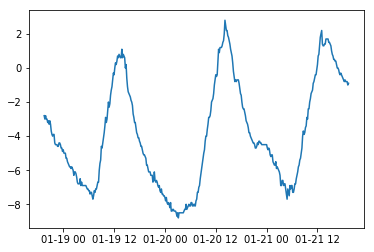

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(data['time'], data['tl']);

## Exercise #08-01: wind classification

**Write a script that takes the station and number of days as input (either as command line arguments or user input, your choice) and prints the following information in the terminal:**

```
At station XXX, over the last X days, the dominant wind direction was XX (xx% of the time). The second most dominant wind direction was XX (xx% of the time), the least dominant wind direction was XX (xx% of the time). The maximum wind speed was XX m/s (DATE and TIME), while the strongest wind speed averaged over an hour was XX m/s (DATE and TIME).
```

With the wind directions being of 8 classes: N, NW, W, SW, S, SE, E, NE.

*Back to the [table of contents](00-Introduction.ipynb#ctoc) or to the [ClimVis project](23-Project1-ClimVis.ipynb)*